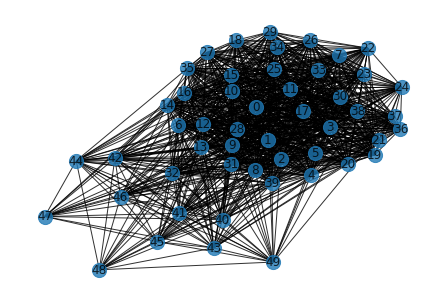

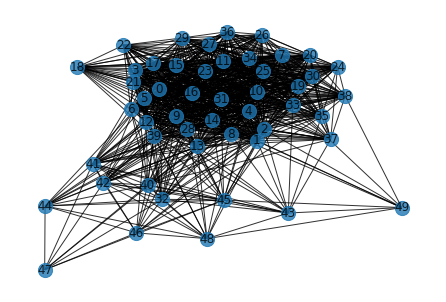

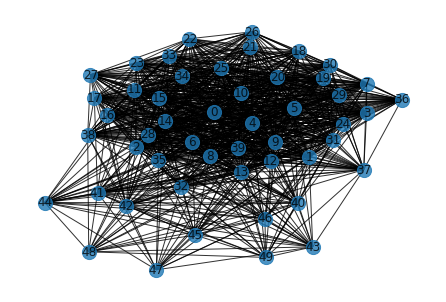

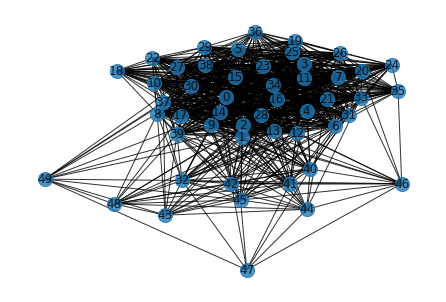

In [1]:
"""
The purpose of this file is to calculate the node centrality indicators of the network, 
and save them in a new csv file.

"""

import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import plotly
import datetime as dt
import networkx as nx
import numpy as np
import matplotlib as mpl
import statistics as sts


df = pd.read_csv('flightdata.csv')

#top 50 airports
df_count = df['origin'].value_counts().rename_axis('origin').reset_index(name='counts')
df_50 = df[df['origin'].isin(df_count.head(50)['origin']) 
            & df['destination'].isin(df_count.head(50)['origin'])]
df_50 = df_50.iloc[:, 1:4]
df_50["count"] = ""

#Count the flights
df_50_OD = df_50.groupby(['origin','destination','day'],as_index=False).agg({'count':'count'})


#transfer airport code to a specific number, otherwise Networkx cannot import it
cities = df_50['origin'].value_counts()
df_cities = pd.DataFrame(cities)
df_cities['origin'] = df_cities.index

airport = np.arange(0, 50).tolist()
df_airport = pd.DataFrame(airport)
df_cities['No.'] = airport


#dictionary of airport code and number
dic_airport = dict(zip(df_cities['origin'],df_cities['No.']))
dic_airport_re = dict(zip(df_cities['No.'],df_cities['origin']))

#replace code with number
df_num = df_50.replace(dic_airport)


df_all = {}
for i in range(1,13):
    for k in [19,20,21]:
        df_all[k,i] = df_num[df_num['day'].str.startswith('20'+str(k)+'-'+str(i).zfill(2))]
    
        
#Remove empty values

df_all_test = df_all
for keys in [(19,1),(19,2),(19,3),(19,4),(19,5),(19,6),(19,7),(19,8),(19,9),(21,11),(21,12)]:
    df_all_test.pop(keys,None)

#Save the 50 networks in a list
df_all = df_all_test
df_all_OD = []
df_all_odpair= []
df_all_weight = []
arr_all_od = []
arr_all_weight = []
G = []



i=0
arr_od = [[] for m in range(25)]
for k in df_all: 
    df_all_odpair.append(df_all[k].iloc[:, 0:2])
    arr_od[i] = df_all_odpair[i].values
    i = i+1


G = [[] for m in range(25)]
for i in range(25):
    G[i] = nx.Graph()
    G[i].add_nodes_from(airport)
    G[i].add_edges_from(arr_od[i])


#compute average degree centrality

avg_dc = [[] for m in range(25)]
dc_all = [[] for m in range(25)]
for i in range(25):
    dc_all[i] = nx.degree_centrality(G[i])
    avg_dc[i] = np.average(list(dc_all[i].values()))


#compute average betweenness centrality
avg_bc = [[] for m in range(25)]
bc_all = [[] for m in range(25)]
for i in range(25):
    bc_all[i] = nx.betweenness_centrality(G[i])
    avg_bc[i] = np.average(list(bc_all[i].values()))



#%%
monthlist = ['Oct.19','Nov.19','Dec.19','Jan.20','Feb.20',
             'Mar.20','Apr.20','May.20','Jun.20','Jul.20',
             'Aug.20','Sep.20','Oct.20','Nov.20','Dec.20',
             'Jan.21','Feb.21',
             'Mar.21','Apr.21','May.21','Jun.21','Jul.21',
             'Aug.21','Sep.21','Oct.21']
df_month = pd.DataFrame (monthlist, columns = ['Month'])

#Create dataframe storing degree centrality
dc_name_list = ['Degree Centrality']*25
df_dc_name = pd.DataFrame (dc_name_list, columns = ['Indicator'])
df_dc_value = pd.DataFrame (avg_dc, columns = ['Value'])
df_dc = pd.concat([df_dc_name, df_dc_value, df_month], axis = 'columns')

#Create dataframe storing betweenness centrality
bc_name_list = ['Betweenness Centrality']*25
df_bc_name = pd.DataFrame (bc_name_list, columns = ['Indicator'])
df_bc_value = pd.DataFrame (avg_bc, columns = ['Value'])
df_bc = pd.concat([df_bc_name, df_bc_value, df_month], axis = 'columns')


#Create dataframe storing indicators
df_ind = pd.concat([df_dc, df_bc])
df_ind.to_csv('NetworkCentrality.csv')
df_bc.to_csv('Betweenness.csv')











